In [1]:
import pandas as pd
import numpy as np

In [2]:
#load data
df = pd.read_excel("titanic.v2.xls")

df.head() #first 5 rows

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
## move name column to first column
col = df.pop("name")
df.insert(0, col.name, col)
df.head()

,name,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
#descriptive statistics
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,3139.000000,3139.000000,2577.000000,3139.000000,3139.000000,3137.000000,305.000000
mean,2.168206,0.405862,30.600310,0.476903,0.374642,36.164622,159.622951
std,0.840951,0.491136,14.536398,0.981193,0.831851,53.844865,95.547619
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000,75.000000
50%,2.000000,0.000000,29.000000,0.000000,0.000000,15.900000,155.000000
75%,3.000000,1.000000,40.000000,1.000000,0.000000,35.500000,255.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [5]:
#total number of passengers
total = len(df)

print(total)

3139


In [6]:
#check to see if there are any missing values
df.count()

name         3139
pclass       3139
survived     3139
sex          3139
age          2577
sibsp        3139
parch        3139
ticket       3139
fare         3137
cabin         802
embarked     3133
boat         1242
body          305
home.dest    1987
dtype: int64

In [7]:
df.isnull().sum()

name            0
pclass          0
survived        0
sex             0
age           562
sibsp           0
parch           0
ticket          0
fare            2
cabin        2337
embarked        6
boat         1897
body         2834
home.dest    1152
dtype: int64

In [8]:
## these columns have lot of missing values
df.drop("body", axis=1, inplace = True) 
df.drop("cabin", axis=1, inplace = True)
df.drop("home.dest", axis=1, inplace = True)
df.drop("boat", axis=1, inplace = True)
df

,name,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
0,"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,24160,211.3375,S
1,"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,113781,151.5500,S
2,"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,113781,151.5500,S
3,"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,113781,151.5500,S
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
3134,"Allen, Mr. William Henry",3,0,male,35.0000,0,0,373450,8.0500,S
3135,"Allum, Mr. Owen George",3,0,male,18.0000,0,0,2223,8.3000,S
3136,"Andersen, Mr. Albert Karvin",3,0,male,32.0000,0,0,C 4001,22.5250,S
3137,"Andersen-Jensen, Miss. Carla Christine Nielsine",3,1,female,19.0000,1,0,350046,7.8542,S


In [9]:
## drop unnecessary column
df.drop(["ticket"], axis=1, inplace = True)
df

,name,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,211.3375,S
1,"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,151.5500,S
2,"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,151.5500,S
3,"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,151.5500,S
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
3134,"Allen, Mr. William Henry",3,0,male,35.0000,0,0,8.0500,S
3135,"Allum, Mr. Owen George",3,0,male,18.0000,0,0,8.3000,S
3136,"Andersen, Mr. Albert Karvin",3,0,male,32.0000,0,0,22.5250,S
3137,"Andersen-Jensen, Miss. Carla Christine Nielsine",3,1,female,19.0000,1,0,7.8542,S


In [10]:
df["age"].median()

29.0

In [11]:
df["age"].fillna(df["age"].mean(), inplace = True)  ## fill missing age values with mean age

In [12]:
#rows of passangers that survived
df_survive = df[df['survived'] >= 1]

#number of students that passed
n_survive = len(df_survive)

print(n_survive)

1274


In [13]:
df.isnull().sum()

name        0
pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        2
embarked    6
dtype: int64

In [14]:
df.dropna(subset=["fare"], inplace = True)
df.dropna(subset=["embarked"], inplace = True)

In [15]:
df.isnull().sum()

name        0
pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3131 entries, 0 to 3138
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      3131 non-null   object 
 1   pclass    3131 non-null   int64  
 2   survived  3131 non-null   int64  
 3   sex       3131 non-null   object 
 4   age       3131 non-null   float64
 5   sibsp     3131 non-null   int64  
 6   parch     3131 non-null   int64  
 7   fare      3131 non-null   float64
 8   embarked  3131 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 244.6+ KB


### Gaussian Naïve Bayes

There are different types of Naive Bayes functions and in the examples below, we will use Gaussian Bayes to build the predictive model. Gaussian Bayes uses conditional probability on data that is normally distributed.

In [17]:
from sklearn.naive_bayes import GaussianNB   #import Gaussian Bayes modeling function
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:
df.head()

,name,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,211.3375,S
1,"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,151.5500,S
2,"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,151.5500,S
3,"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,151.5500,S
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,151.5500,S


In [54]:
#create a dataframe with columns to use in the model
modeldf = df[['sex', 'age', 'survived', 'fare', 'sibsp','pclass', 'embarked']].copy()
modeldf.head()


,sex,age,survived,fare,sibsp,pclass,embarked
0,female,29.0000,1,211.3375,0,1,S
1,male,0.9167,1,151.5500,1,1,S
2,female,2.0000,0,151.5500,1,1,S
3,male,30.0000,0,151.5500,1,1,S
4,female,25.0000,0,151.5500,1,1,S


In [55]:
modeldf['embarked'].value_counts()

S    2199
C     676
Q     256
Name: embarked, dtype: int64

In [56]:
#transform gender column to binary values (0,1). Embarked columns assign numeric values
modeldf['sex'] = modeldf['sex'].map({'female': 0, 'male': 1})
modeldf['embarked'] = modeldf['embarked'].map({'S': 1, 'C': 2, 'Q': 3})

modeldf.head()

,sex,age,survived,fare,sibsp,pclass,embarked
0,0,29.0000,1,211.3375,0,1,1
1,1,0.9167,1,151.5500,1,1,1
2,0,2.0000,0,151.5500,1,1,1
3,1,30.0000,0,151.5500,1,1,1
4,0,25.0000,0,151.5500,1,1,1


In [57]:
modeldf.drop(['embarked', 'pclass', 'sibsp'], axis = 1, inplace = True)

In [58]:
#see which features are correlated to each other
modeldf.corr()

,sex,age,survived,fare
sex,1.000000,0.068058,-0.555377,-0.187084
age,0.068058,1.000000,-0.076811,0.169270
survived,-0.555377,-0.076811,1.000000,0.240120
fare,-0.187084,0.169270,0.240120,1.000000


In [59]:
modeldf['survived'].value_counts()

0    1863
1    1268
Name: survived, dtype: int64

In [60]:
modeldf.dtypes

sex           int64
age         float64
survived      int64
fare        float64
dtype: object

In [61]:
#dataframe with predicting features
X = modeldf.drop('survived', axis=1)

#column of predictive target values
y = modeldf['survived']

In [62]:
X

,sex,age,fare
0,0,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,1,30.0000,151.5500
4,0,25.0000,151.5500
...,...,...,...
3134,1,35.0000,8.0500
3135,1,18.0000,8.3000
3136,1,32.0000,22.5250
3137,0,19.0000,7.8542


In [63]:
y.value_counts()

0    1863
1    1268
Name: survived, dtype: int64

In [64]:
#create training and test data
#will leave test size at default (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [65]:
#initialize Gaussian Bayes classifier
gnb = GaussianNB()

In [66]:
#train the model to learn trends
gnb.fit(X_train, y_train)

GaussianNB()

In [67]:
#predictive score of the model on the training data
gnb.score(X_train, y_train)

0.7815161839863713

In [68]:
#test the model on unseen data
#score predictive values in variable
y_pred = gnb.predict(X_test)

In [69]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Died', 'Predicted Survived'],
    index=['True Died', 'True Survived']
)

cm

,Predicted Died,Predicted Survived
True Died,377,90
True Survived,94,222


In [70]:
#frequency of passed students to failed students in the test dataset
y_test.value_counts()

0    467
1    316
Name: survived, dtype: int64

In [71]:
#predictive score of the model on the test data
gnb.score(X_test, y_test)

0.7650063856960408

In [72]:
#predictive score of the model for each predictive category
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       467
           1       0.71      0.70      0.71       316

    accuracy                           0.77       783
   macro avg       0.76      0.75      0.76       783
weighted avg       0.76      0.77      0.76       783



#### Lets try to improve the predictive score by removing columns

In [73]:
modeldf_2 = modeldf[['sex', 'age', 'survived', 'fare']].copy()
modeldf_2.head()

,sex,age,survived,fare
0,0,29.0000,1,211.3375
1,1,0.9167,1,151.5500
2,0,2.0000,0,151.5500
3,1,30.0000,0,151.5500
4,0,25.0000,0,151.5500


In [74]:
#dataframe with predicting features
X = modeldf_2.drop('survived', axis=1)

#column of predictive target values
y = modeldf_2['survived']

In [75]:
#create training and test data
#will leave test size at default (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [76]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [77]:
#predictive score of the model on the training data
gnb.score(X_train, y_train)

0.7798126064735945

In [78]:
y_pred = gnb.predict(X_test)

In [79]:

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Died', 'Predicted Survived'],
    index=['True Died', 'True Survived']
)

cm

,Predicted Died,Predicted Survived
True Died,401,81
True Survived,94,207


In [80]:
gnb.score(X_test, y_test)

0.776500638569604

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       482
           1       0.72      0.69      0.70       301

    accuracy                           0.78       783
   macro avg       0.76      0.76      0.76       783
weighted avg       0.77      0.78      0.78       783



### Bernoulli's Naïve Bayes

Bernoull's Naïve Bayes classifier is best on a target variable that is binary (Boolean; True/False (1,0) values). Let's try this method on the dataset from the previous example.

In [82]:
#import Bernoulli Naïve Bayes function from scikit-learn library
from sklearn.naive_bayes import BernoulliNB

In [83]:
#initialize Bernoulli Naïve Bayes function to a variable
bnb = BernoulliNB()

In [84]:
#build the model with training data
bnb.fit(X_train, y_train)

BernoulliNB()

In [85]:
#model's predictive score on the training data
bnb.score(X_train, y_train)

0.7913117546848382

In [86]:
#test the model on unseen data
#score predictive values in variable
y_pred = gnb.predict(X_test)

In [87]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Died', 'Predicted Survived'],
    index=['True Died', 'True Survived']
)

cm

,Predicted Died,Predicted Survived
True Died,401,81
True Survived,94,207


In [88]:
#predictive score of the model on the test data
gnb.score(X_test, y_test)

0.776500638569604

### Logical Regression Modeling

In [89]:
import statsmodels.formula.api as sm

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [90]:
df_logical = df.copy()

In [91]:
df_logical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3131 entries, 0 to 3138
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      3131 non-null   object 
 1   pclass    3131 non-null   int64  
 2   survived  3131 non-null   int64  
 3   sex       3131 non-null   object 
 4   age       3131 non-null   float64
 5   sibsp     3131 non-null   int64  
 6   parch     3131 non-null   int64  
 7   fare      3131 non-null   float64
 8   embarked  3131 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 244.6+ KB


In [92]:
df_logical.head()

,name,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,211.3375,S
1,"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,151.5500,S
2,"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,151.5500,S
3,"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,151.5500,S
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,151.5500,S


In [93]:
## convert gender column to binary values. embarked to numeric values
df_logical['sex'] = df_logical['sex'].map({'female': 0, 'male': 1})
df_logical['embarked'] = df_logical['embarked'].map({'S': 1, 'C': 2, 'Q': 3})

In [94]:
df_logical.head()

,name,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,"Allen, Miss. Elisabeth Walton",1,1,0,29.0000,0,0,211.3375,1
1,"Allison, Master. Hudson Trevor",1,1,1,0.9167,1,2,151.5500,1
2,"Allison, Miss. Helen Loraine",1,0,0,2.0000,1,2,151.5500,1
3,"Allison, Mr. Hudson Joshua Creighton",1,0,1,30.0000,1,2,151.5500,1
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,0,25.0000,1,2,151.5500,1


In [95]:
df_logical.corr()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
pclass,1.000000,-0.302402,0.113769,-0.367156,0.073421,0.037528,-0.542086,0.016939
survived,-0.302402,1.000000,-0.555377,-0.076811,-0.017398,0.100608,0.240120,0.097731
sex,0.113769,-0.555377,1.000000,0.068058,-0.109829,-0.212025,-0.187084,-0.108701
age,-0.367156,-0.076811,0.068058,1.000000,-0.180076,-0.139450,0.169270,0.047609
sibsp,0.073421,-0.017398,-0.109829,-0.180076,1.000000,0.363201,0.146270,-0.063338
parch,0.037528,0.100608,-0.212025,-0.139450,0.363201,1.000000,0.203285,-0.083939
fare,-0.542086,0.240120,-0.187084,0.169270,0.146270,0.203285,1.000000,0.102304
embarked,0.016939,0.097731,-0.108701,0.047609,-0.063338,-0.083939,0.102304,1.000000


0    1863
1    1268
Name: survived, dtype: int64


<AxesSubplot:xlabel='survived', ylabel='count'>

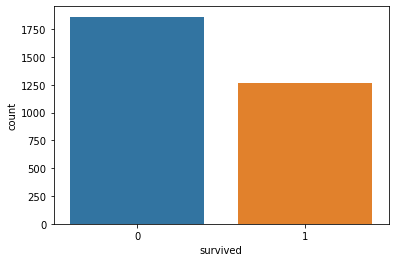

In [96]:
print(df_logical["survived"].value_counts())

sns.countplot(data = df_logical, x = "survived")

survived
0    31.375786
1    29.321991
Name: age, dtype: float64


<AxesSubplot:xlabel='survived', ylabel='age'>

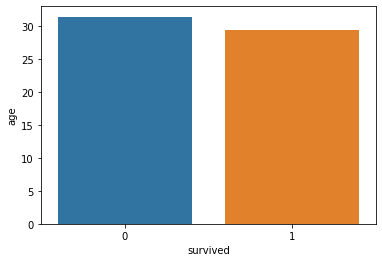

In [97]:
print(df_logical["age"].groupby(df_logical["survived"]).mean())

###

sns.barplot(data = df_logical, x = "survived", y = "age", ci = None)

survived
0    25.412275
1    51.755009
Name: fare, dtype: float64


<AxesSubplot:xlabel='survived', ylabel='fare'>

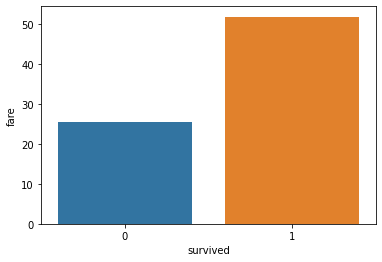

In [98]:
print(df_logical["fare"].groupby(df_logical["survived"]).mean())

###

sns.barplot(data = df_logical, x = "survived", y = "fare", ci = None)

### looks like those that survived paid a higher fare

survived
0    0.857756
1    0.313880
Name: sex, dtype: float64


<AxesSubplot:xlabel='survived', ylabel='sex'>

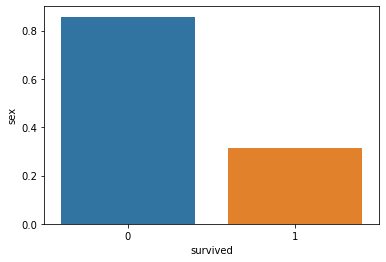

In [99]:
print(df_logical["sex"].groupby(df_logical["survived"]).mean())

###

sns.barplot(data = df_logical, x = "survived", y = "sex", ci = None)

#### Those that died were mostly men

In [100]:
pd.crosstab(df_logical["sex"], df_logical["survived"], margins=False, normalize=False)

survived,0,1
sex,,
0,265,870
1,1598,398


In [101]:
df_logical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3131 entries, 0 to 3138
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      3131 non-null   object 
 1   pclass    3131 non-null   int64  
 2   survived  3131 non-null   int64  
 3   sex       3131 non-null   int64  
 4   age       3131 non-null   float64
 5   sibsp     3131 non-null   int64  
 6   parch     3131 non-null   int64  
 7   fare      3131 non-null   float64
 8   embarked  3131 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 309.1+ KB


In [102]:
## creating the model is VERY similar to a linear regression model
## include "logit" instead of "ols"

mod1 = sm.logit('survived ~ age + sex + fare + embarked + sibsp', data=df_logical).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.487083
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 3131
Model:                          Logit   Df Residuals:                     3125
Method:                           MLE   Df Model:                            5
Date:                Thu, 21 Apr 2022   Pseudo R-squ.:                  0.2784
Time:                        18:50:41   Log-Likelihood:                -1525.1
converged:                       True   LL-Null:                       -2113.4
Covariance Type:            nonrobust   LLR p-value:                3.413e-252
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5352      0.171      8.953      0.000       1.199       1.871
age           -0.0219      0.004     -5.970      0.000      -0.029      -0.015
sex           -2.5736      0.096    -26.933      0.000      -2.761      -2.386
fare           0.0116      0.001      9.937      0.000       0.009       0.014
embarked       0.0744      0.072      1.034      0.301      -0.067       0.215
sibsp         -0.4016      0.056     -7.227      0.000      -0.511      -0.293
==============================================================================
"""

In [103]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

df_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

df_odds["Sig"] = np.where(df_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df_odds

,OR,pvalue,Sig
Intercept,4.642272,3.467820e-19,Sig
age,0.978367,2.370072e-09,Sig
sex,0.076263,8.915439e-160,Sig
fare,1.011680,2.868360e-23,Sig
embarked,1.077244,3.011040e-01,Not Sig
sibsp,0.669231,4.933621e-13,Sig


In [104]:
## percent change = OR minus 1 multiplied by 100

df_odds["Pct Change"] = (df_odds["OR"] - 1) * 100

df_odds

,OR,pvalue,Sig,Pct Change
Intercept,4.642272,3.467820e-19,Sig,364.227209
age,0.978367,2.370072e-09,Sig,-2.163261
sex,0.076263,8.915439e-160,Sig,-92.373732
fare,1.011680,2.868360e-23,Sig,1.168001
embarked,1.077244,3.011040e-01,Not Sig,7.724380
sibsp,0.669231,4.933621e-13,Sig,-33.076916


In [105]:
df_logical['sibsp'].value_counts()

0    2127
1     786
2     102
4      45
3      41
8      18
5      12
Name: sibsp, dtype: int64

In [106]:
mod1.predict({
    'age': 30, 
    'sex': 0, 
    'fare': 67, 
    'embarked': 2, 
    'sibsp': 1})

## if probability is greater than 50% > we classify this individual as having survived

0    0.802868
dtype: float64

#### 30 year old female who paid $67 embarked at C and on sibsp 1 is most likely going to survive

In [107]:
mod1.predict({
    'age': 30, 
    'sex': 1, 
    'fare': 67, 
    'embarked': 2, 
    'sibsp': 1})

## if probability is greater than 50% > we classify this individual as having survived

0    0.236989
dtype: float64

#### 30 year old male who paid $67 embarked at C and on sibsp 1 most likely will die

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

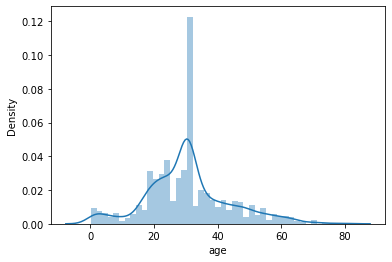

In [108]:
sns.distplot(df_logical['age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

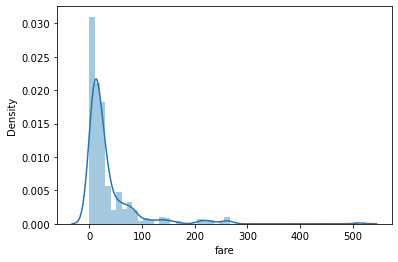

In [109]:
sns.distplot(df_logical['fare'])

In [110]:
df_logical['age'].describe()

count    3131.000000
mean       30.544035
std        13.127618
min         0.166700
25%        23.000000
50%        30.600310
75%        36.000000
max        80.000000
Name: age, dtype: float64

In [111]:
df_logical['fare'].describe()

count    3131.000000
mean       36.080620
std        53.862201
min         0.000000
25%         8.050000
50%        15.850000
75%        35.500000
max       512.329200
Name: fare, dtype: float64

In [112]:
df_logical['fare'].mode()

0    13.0
dtype: float64

In [120]:
df_log = df_logical.copy()

In [121]:
df_log.drop("name", axis = 1, inplace = True)

In [135]:
df_log.shape

(3131, 8)

In [136]:
df_log.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,3.401197,0,0,5.358177,1
1,1,1,1,0.650605,1,2,5.027492,1
2,1,0,0,1.098612,1,2,5.027492,1
3,1,0,1,3.433987,1,2,5.027492,1
4,1,0,0,3.258097,1,2,5.027492,1


In [137]:
cols = ['age', 'fare']

for col in cols:
    df_log[col] = np.log(1 + df_log[col])

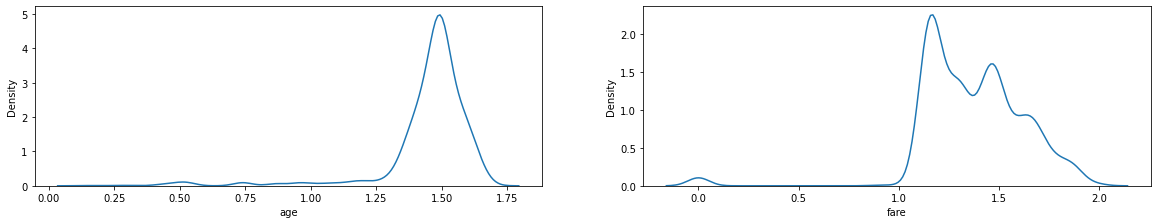

In [138]:
plt.figure(figsize=(20,35))
for i, col in enumerate(cols):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df_log[col], ax=ax)
    plt.xlabel(col)
        
plt.show()

In [139]:
#dataframe with predicting features
X = df_log.drop('survived', axis=1)

#column of predictive target values
y = df_log['survived']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [147]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [148]:
gnb.score(X_train, y_train)

0.7802385008517888

In [149]:
y_pred = gnb.predict(X_test)

In [150]:

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Died', 'Predicted Survived'],
    index=['True Died', 'True Survived']
)

cm

,Predicted Died,Predicted Survived
True Died,376,78
True Survived,80,249


In [151]:
gnb.score(X_test, y_test)

0.7982120051085568

In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       454
           1       0.76      0.76      0.76       329

    accuracy                           0.80       783
   macro avg       0.79      0.79      0.79       783
weighted avg       0.80      0.80      0.80       783



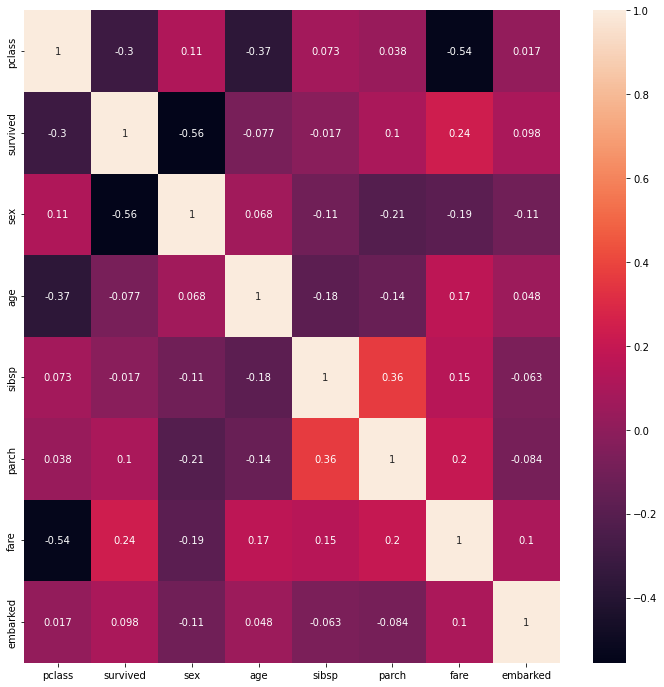

In [117]:
plt.figure(figsize=(12,12))
sns.heatmap(df_log.corr(), annot=True)
plt.show()